In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [9]:
def get_data(ticker):
    data=yf.download(ticker,period="5y",interval="1d")
    return data

In [10]:
df_rel=get_data('RELIANCE.NS')

[*********************100%%**********************]  1 of 1 completed


In [11]:
df_rel

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,1063.734619,1086.410156,1051.802612,1079.141235,1057.445435,11314111
2019-08-02,1074.980957,1095.599121,1062.546021,1082.889893,1067.488037,11883403
2019-08-05,1067.026245,1067.026245,1031.367310,1045.402344,1030.533813,15199566
2019-08-06,1037.539062,1051.116943,1025.881348,1031.641602,1016.968811,14533997
2019-08-07,1029.995850,1041.013550,1008.600403,1014.360718,999.933594,12674684
...,...,...,...,...,...,...
2024-07-26,2984.800049,3024.850098,2980.699951,3018.050049,3018.050049,4929970
2024-07-29,3023.899902,3055.000000,3023.550049,3040.199951,3040.199951,3769275
2024-07-30,3034.050049,3050.000000,3020.000000,3026.300049,3026.300049,4114104


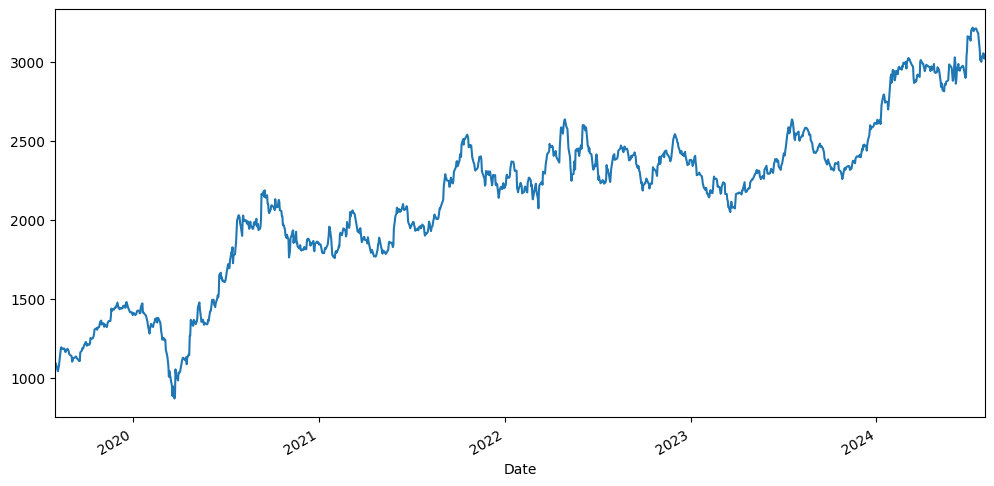

In [17]:
df_rel['High'].plot(figsize=(12,6)).autoscale(axis="x",tight=True)

<Axes: xlabel='Date'>

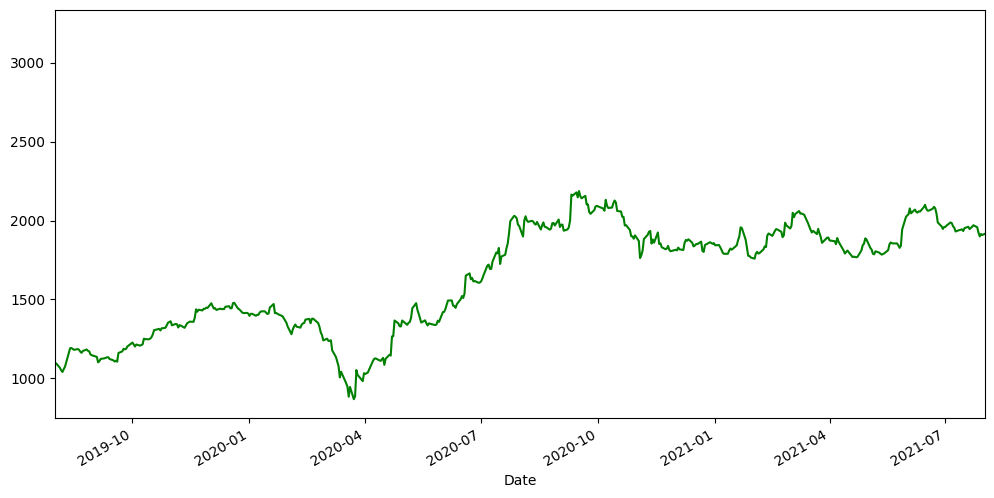

In [96]:
#High price from 2019 to 2021
df_rel['High'].plot(xlim=["2019-08-01","2021-08-01"],figsize=(12,6), c="green")

In [24]:
df_index=df_rel.loc["2019-08-01":"2021-08-01"].index
df_open=df_rel.loc["2019-08-01":"2021-08-01"]["Open"]

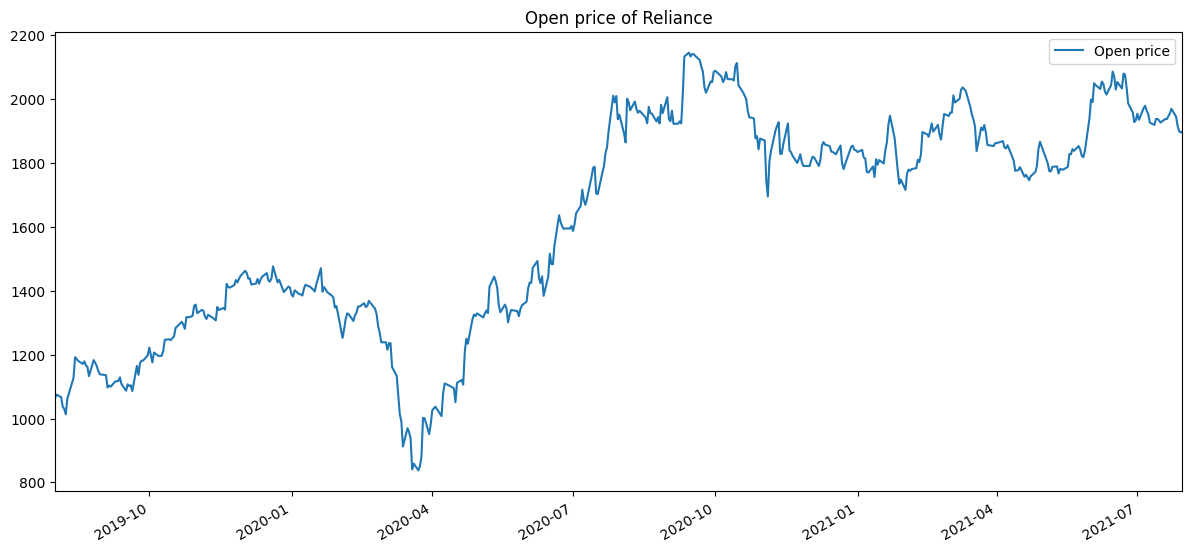

In [97]:
#Open price of stocks
fig,axis=plt.subplots(figsize=(12,6))
plt.tight_layout()
fig.autofmt_xdate()
axis.plot(df_index,df_open,label="Open price")
axis.set_title("Open price of Reliance")
axis.legend()
axis.autoscale(axis="x",tight=True)


## Resampling

<Axes: xlabel='Date'>

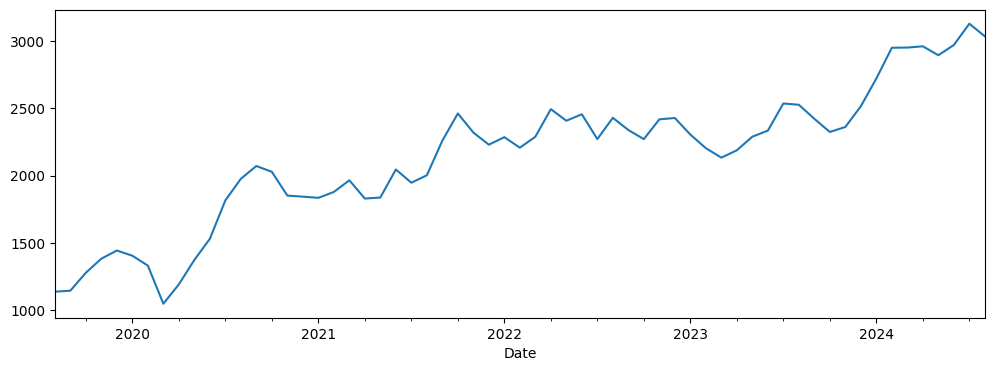

In [98]:
#resampling the prices montly and taking mean of there High prices and plotting them
df_rel.resample(rule="M").mean()['High'].plot(figsize=(12,4))

In [99]:
#for interactive graph
import plotly.express as px
import plotly as pt

In [104]:
#resampling data and taking there mean
resampled_data=df_rel.resample(rule="M").mean()

In [101]:
resampled_data.index

DatetimeIndex(['2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
               '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31',
      

In [106]:
resampled_data=resampled_data.reset_index()

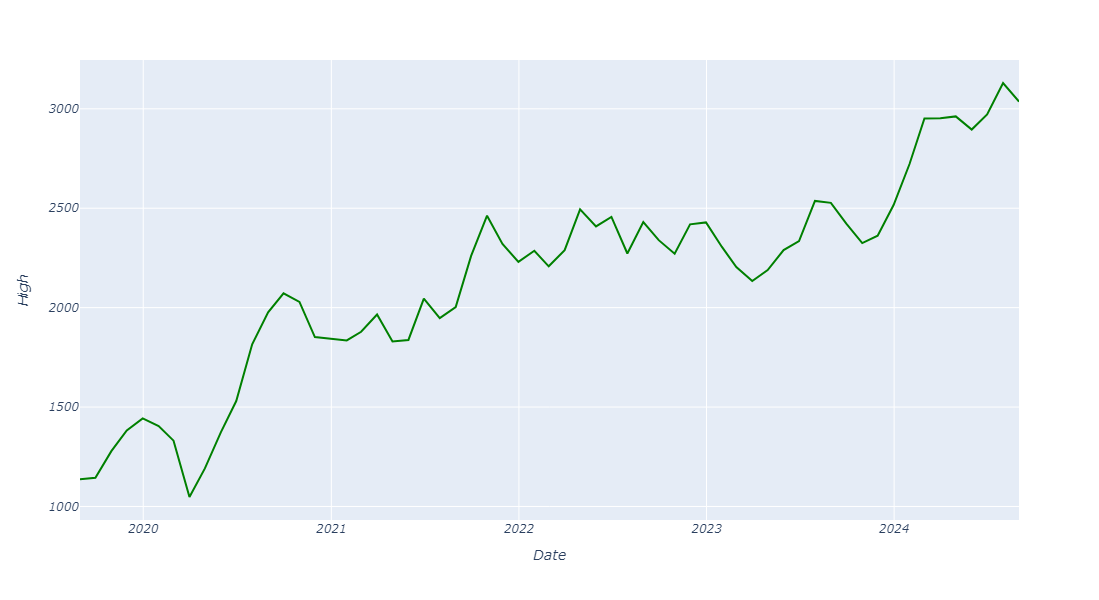

In [107]:
#ploting High price according to monthly average
fig=px.line(resampled_data,x='Date',y="High")
fig.update_layout(width=800,height=600)
fig.update_traces(line=dict(color="green"))
fig.show()

In [108]:
#resampling the data monthly and taking the max
max_df=df_rel.resample(rule="M").max()

In [109]:
max_df.reset_index(inplace=True)

In [110]:
max_df

,Date,Open,High,Low,Close,Adj Close,Volume,rolling-30
0,2019-08-31,1192.289917,1192.701294,1170.665894,1181.866455,1165.057007,52413572,NaN
1,2019-09-30,1197.775879,1221.319946,1193.707031,1218.119751,1200.794678,24082780,1141.151237
2,2019-10-31,1356.869751,1362.035767,1336.480103,1352.389526,1333.154663,17503195,1224.189412
3,2019-11-30,1446.428589,1448.440186,1429.970703,1444.920044,1424.369263,21769060,1348.639233
4,2019-12-31,1476.647339,1478.978882,1459.366455,1472.029907,1451.093506,15612682,1428.364465
...,...,...,...,...,...,...,...,...
56,2024-04-30,2984.949951,2988.000000,2965.000000,2973.899902,2973.899902,9502846,2939.454989
57,2024-05-31,2967.250000,2984.449951,2952.199951,2972.100098,2972.100098,15534916,2926.064982
58,2024-06-30,3062.050049,3162.000000,3062.050049,3130.800049,3130.800049,18354549,2919.933350
59,2024-07-31,3208.899902,3217.600098,3171.000000,3201.800049,3201.800049,9837188,3063.454997


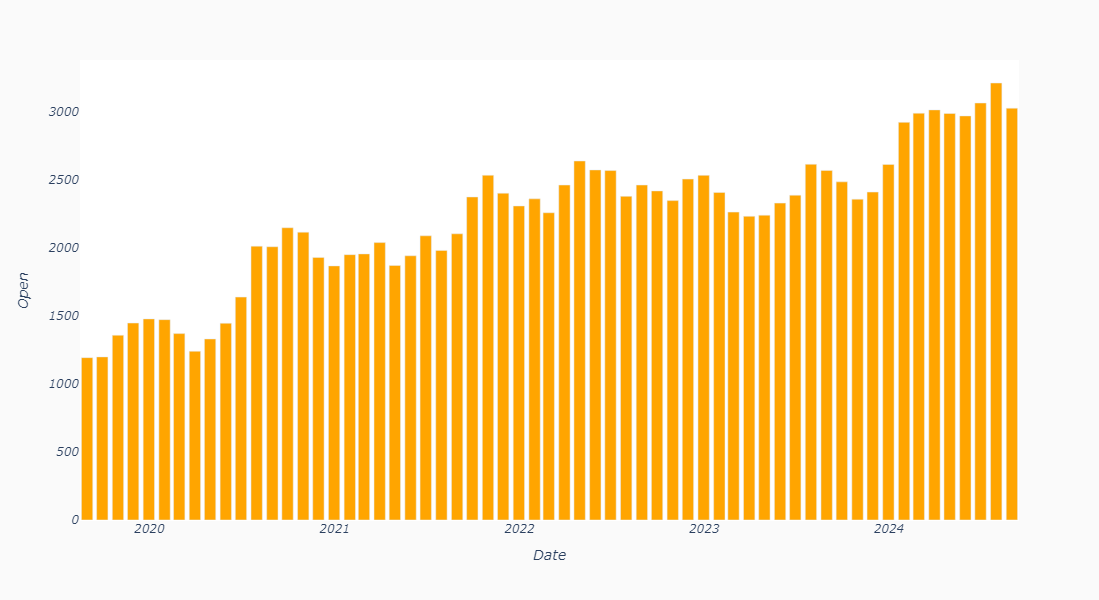

In [117]:
#plotting bar graph of max data monthly
fig=px.bar(max_df,x="Date",y="Open")
fig.update_traces(marker_color="orange")
fig.update_layout(width=1200,height=600,plot_bgcolor="#ffffff",paper_bgcolor="#fafafa")
fig.show()

In [113]:
#adding 30 days rolling mean as column
df_rel["rolling-30"]=df_rel['Open'].rolling(30).mean()

In [114]:
#resetting the index
df_rel_date=df_rel.reset_index()

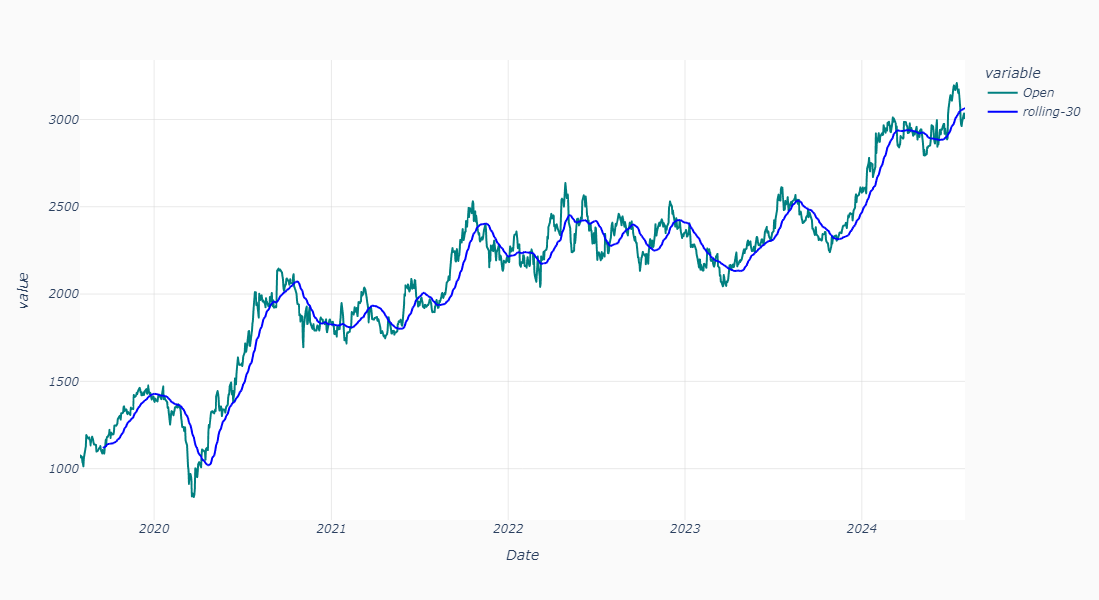

In [115]:
#plotting rolling mean and open price on graph
fig=px.line(df_rel_date,x="Date",y=["Open","rolling-30"])
fig.for_each_trace(lambda t:t.update(line_color={
    'Open':"teal","rolling-30":"blue"
}[t.name]))
fig.update_layout(width=1000,height=600,plot_bgcolor="#ffffff",paper_bgcolor="#fafafa")
fig.update_xaxes(showgrid=True, gridcolor='lightgray', gridwidth=0.5)
fig.update_yaxes(showgrid=True, gridcolor='lightgray', gridwidth=0.5)
fig.show()